# Flashpoint Analytics

[Flashpoint](https://bluemaxima.org/flashpoint/) is a web-game preservation project, made in 2018 in an effort to save as many games as possible from the then upcoming Flash End-Of-Life, while also making them playable for everyone. Today, it hosts more than 170 000 games and thousands of active users all around the world.

This notebook contains a descriptive statistical analysis about the games available in Flashpoint, with an emphasis on categorical data, such as the technology that was used to make them or the publisher who used to host them in the past.

The Flashpoint database, which keeps all the data that will be used in the analysis, can be found [here](http://infinity.unstable.life/Flashpoint/Data/flashpoint.sqlite).

## Import modules

In [83]:
import os
import urllib.request
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

These are the modules that we are going to use for our analysis. Notably:
* *sqlite3* allows us to communicate with a SQLite database;
* *pandas* offers very useful tools for working with data;
* *seaborn* and *matplotlib* come with some handful functions to display and visualize data.

## Retrieve data

In [44]:
#os.mkdir("data")

# download data from the source

url = "http://infinity.unstable.life/Flashpoint/Data/flashpoint.sqlite"
filename = "data/flashpoint.sqlite"
#urllib.request.urlretrieve(url, filename)

# connect to the database and store the "game" table in a dataframe

con = sqlite3.connect("data/flashpoint.sqlite")
df = pd.read_sql_query("SELECT * FROM game", con)
con.close()

## Explore data 

Let's have a first look at our data.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177469 entries, 0 to 177468
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   177469 non-null  object 
 1   parentGameId         57600 non-null   object 
 2   title                177469 non-null  object 
 3   alternateTitles      177469 non-null  object 
 4   series               177469 non-null  object 
 5   developer            177469 non-null  object 
 6   publisher            177469 non-null  object 
 7   dateAdded            177469 non-null  object 
 8   dateModified         177469 non-null  object 
 9   platform             177469 non-null  object 
 10  broken               177469 non-null  int64  
 11  extreme              177469 non-null  int64  
 12  playMode             177469 non-null  object 
 13  status               177469 non-null  object 
 14  notes                177469 non-null  object 
 15  source           

There is a total of 27 variables and almost all of them belong to the *object* data type. We are going to need only some of them, so let's keep only the relevant ones.

In [45]:
vars_to_keep = ["id", "title", "developer", "publisher", "platform", "releaseDate", "language", "tagsStr"]
df = df[vars_to_keep]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177469 entries, 0 to 177468
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           177469 non-null  object
 1   title        177469 non-null  object
 2   developer    177469 non-null  object
 3   publisher    177469 non-null  object
 4   platform     177469 non-null  object
 5   releaseDate  177469 non-null  object
 6   language     177469 non-null  object
 7   tagsStr      177469 non-null  object
dtypes: object(8)
memory usage: 10.8+ MB


Among the remaining variables there are no missing values.

To complete our preliminary analysis, let's print the first rows of our dataframe.

In [38]:
df.head()

,id,title,developer,publisher,platform,releaseDate,language
0,6db72888-6aa5-34c9-0ff3-ffe4cfe0fc61,All Grown Up: Krazy Karts,Ezone,Nickelodeon,3D Groove GX,,
1,3bba3af6-8e76-b2c8-b423-2d2d8bdfdd50,Showdown: The Gunfighting Game,3D Groove,3D Groove,3D Groove GX,,
2,fb479276-2325-4dbb-bafd-64fcc8aeb684,Hamsterball Bowling,Ezone,atv.Disney.go.com,3D Groove GX,,
3,7cdff5f4-11cb-b1de-51bc-bca13ef78adb,Dunk Tank,Ezone,atv.Disney.go.com,3D Groove GX,,
4,1d9ff021-2404-9785-bb7d-0fceda67a55d,Baby Knight,Pepworks,Pepworks,3D Groove GX,,


## Analyze data 

It would be interesting to know which are the most prolific developers and publishers. Let's find out by creating a frequency table for each variable and looking at the first ten entries.

In [63]:
df_developers = df["developer"].value_counts()[:10]
df_developers

                   46151
123Bee              2730
Games2Rule          2441
Games2Jolly.com     1915
Selfdefiant         1603
WowEscape.com       1436
Top10NewGames       1144
PalmarianFire       1059
Ena Game Studio     1031
Neopets              957
Name: developer, dtype: int64

The first row is blank because some games (actually, most of them) do not have a developer value associated in the database. Let's filter out those entries.

In [89]:
df_developers = df.loc[df.developer != '', "developer"].value_counts()[:10]
df_developers

123Bee             2730
Games2Rule         2441
Games2Jolly.com    1915
Selfdefiant        1603
WowEscape.com      1436
Top10NewGames      1144
PalmarianFire      1059
Ena Game Studio    1031
Neopets             957
Mirchi Games        812
Name: developer, dtype: int64

These are the most represented developers in the database. It is impressive to notice that almost all of them are known to be specialised in escape games, which we can suppose to be a very popular genre; we will dig into this later. Lastly, a special mention for Neopets, which managed to build a passionate community still active after over 20 years.

In [90]:
df_publishers = df.loc[df.publisher != '', "publisher"].value_counts()[:10]
df_publishers

DeviantArt         7655
Newgrounds         6550
Disney             2428
Nickelodeon        1659
Armor Games        1437
GameMonetize       1374
Eka's Portal       1261
Cartoon Network    1243
Kongregate         1219
Melting-Mindz      1214
Name: publisher, dtype: int64

Among the publishers, we can see some very renowned names, at least in the gaming community, like *Newgrounds*, *Armor Games* and *Kongregate*. There is also a considerable amount of games published by TV broadcasters, such as *Disney*, *Nickelodeon* and *Cartoon Network*, supposedly to promote their shows.

Now let's look at a visualization of the same data, by making use of bar plots and pie charts.

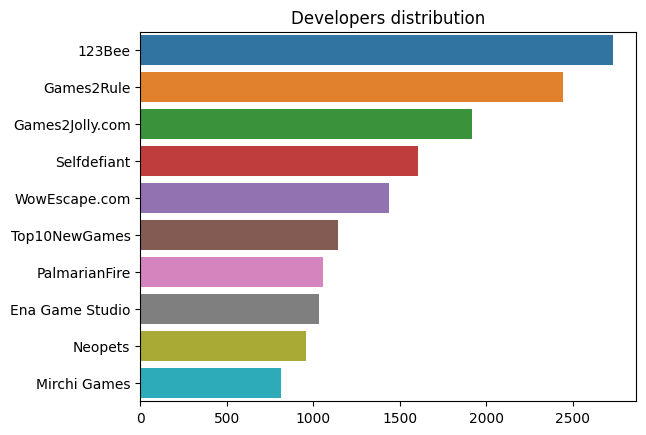

In [136]:
sns.barplot(x = df_developers.values, y = df_developers.index, orient = "h").set(title = "Developers distribution");

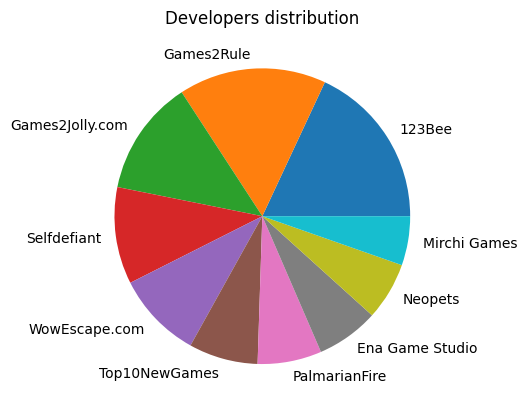

In [175]:
labels = df_developers.index
sizes = df_developers.values / df_developers.values.sum() * 100
plt.pie(sizes, labels = labels)
plt.title("Developers distribution")
plt.show()

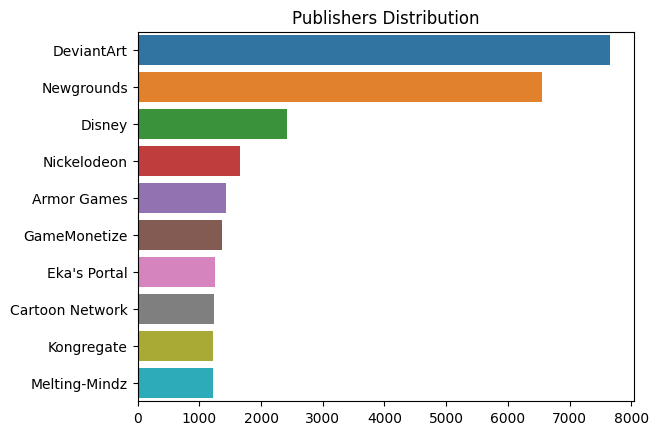

In [137]:
sns.barplot(x = df_publishers.values, y = df_publishers.index, orient = "h").set(title = "Publishers distribution");

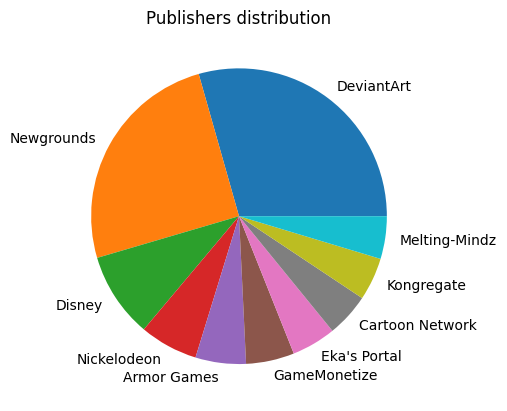

In [174]:
labels = df_publishers.index
sizes = df_publishers.values / df_publishers.values.sum() * 100
plt.pie(sizes, labels = labels)
plt.title("Publishers distribution")
plt.show()